In [1]:
import os

In [2]:
def rename_files_in_subfolders(base_path):
    subfolders = ['train', 'test', 'val']
    for subfolder in subfolders:
        subfolder_path = os.path.join(base_path, 'dataset', subfolder)
        if not os.path.exists(subfolder_path):
            print(f"Subfolder {subfolder_path} does not exist.")
            continue
        for category in ['Onion', 'Tomato']:
            category_path = os.path.join(subfolder_path, category)
            if not os.path.exists(category_path):
                print(f"Category folder {category_path} does not exist.")
                continue
            files = os.listdir(category_path)
            files = [f for f in files if os.path.isfile(os.path.join(category_path, f))]
            for index, filename in enumerate(files):
                new_filename = f"{category.lower()}_{subfolder}_{index + 1}{os.path.splitext(filename)[1]}"
                old_file = os.path.join(category_path, filename)
                new_file = os.path.join(category_path, new_filename)
                os.rename(old_file, new_file)
                print(f"Renamed {old_file} to {new_file}")

In [7]:
base_path = './'

In [8]:
rename_files_in_subfolders(base_path)

Renamed ./dataset\train\Onion\IMG-20240529-WA0010.jpg to ./dataset\train\Onion\onion_train_1.jpg
Renamed ./dataset\train\Onion\IMG-20240529-WA0011.jpg to ./dataset\train\Onion\onion_train_2.jpg
Renamed ./dataset\train\Onion\IMG-20240529-WA0012.jpg to ./dataset\train\Onion\onion_train_3.jpg
Renamed ./dataset\train\Onion\IMG-20240529-WA0013.jpg to ./dataset\train\Onion\onion_train_4.jpg
Renamed ./dataset\train\Onion\IMG-20240529-WA0014.jpg to ./dataset\train\Onion\onion_train_5.jpg
Renamed ./dataset\train\Onion\IMG-20240529-WA0015.jpg to ./dataset\train\Onion\onion_train_6.jpg
Renamed ./dataset\train\Onion\IMG-20240529-WA0016.jpg to ./dataset\train\Onion\onion_train_7.jpg
Renamed ./dataset\train\Onion\IMG-20240529-WA0017.jpg to ./dataset\train\Onion\onion_train_8.jpg
Renamed ./dataset\train\Onion\IMG-20240529-WA0018.jpg to ./dataset\train\Onion\onion_train_9.jpg
Renamed ./dataset\train\Onion\IMG-20240529-WA0019.jpg to ./dataset\train\Onion\onion_train_10.jpg
Renamed ./dataset\train\Onion

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [71]:
train_path = 'dataset/train/'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(300, 300), 
    class_mode='categorical'
)

Found 40 images belonging to 2 classes.


In [64]:
val_path = 'dataset/val/'

val_datagen = ImageDataGenerator(rescale = 1./255)

val_set = val_datagen.flow_from_directory(
    val_path,
    target_size=(300, 300), 
    class_mode='categorical' 
)

Found 6 images belonging to 2 classes.


In [21]:
categories = os.listdir(train_path)

In [22]:
categories

['Onion', 'Tomato']

In [65]:
test_path = 'dataset/test/'

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(300, 300),
    class_mode='categorical',
    shuffle=False
)

Found 5 images belonging to 2 classes.


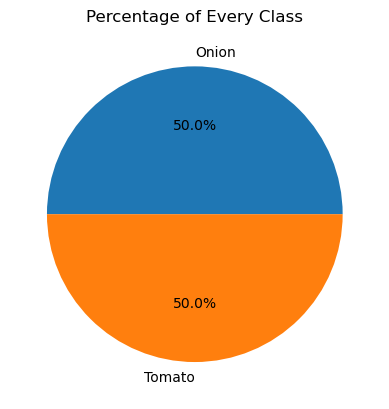

In [42]:
category_size = [0]*len(training_set.class_indices)
for name, indx in training_set.class_indices.items():
    category_size[indx] = len(os.listdir(os.path.join(train_path, name)))

plt.pie(category_size,labels=categories,autopct='%1.1f%%')
plt.title('Percentage of Every Class')
plt.show()

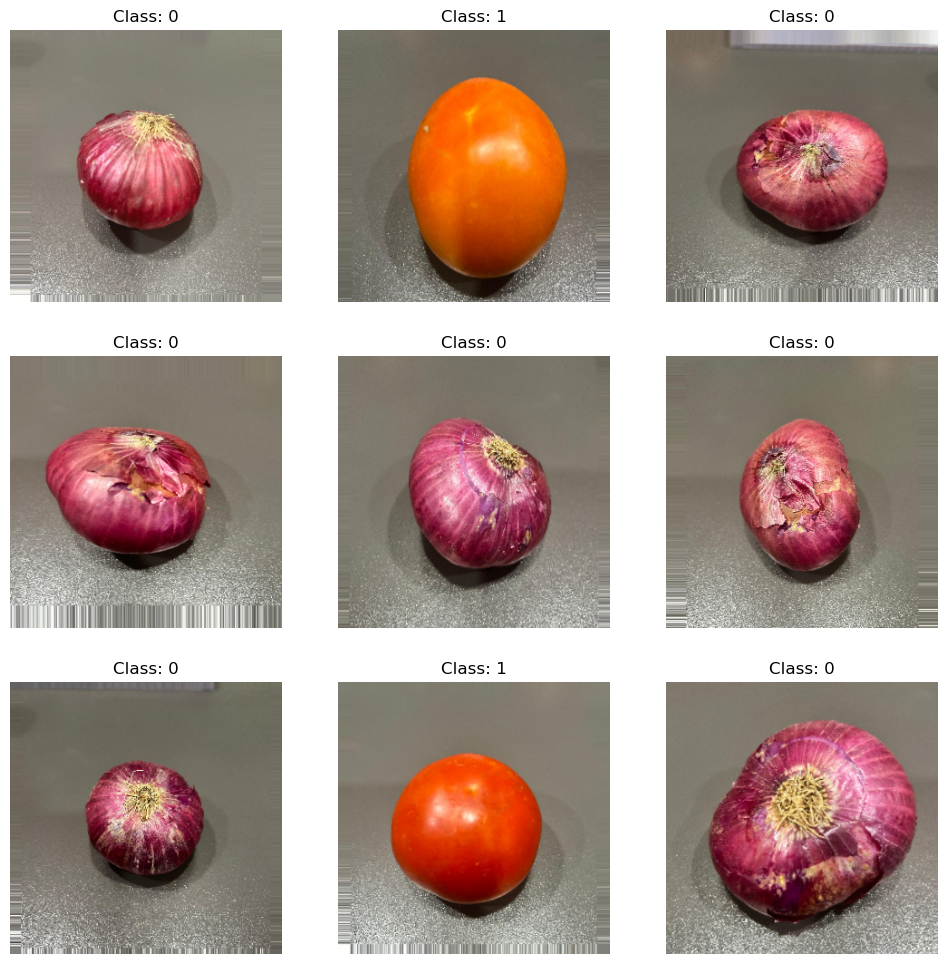

In [72]:
images, labels = next(training_set)

plt.figure(figsize=(12, 12))

for i in range(9): 
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Class: {np.argmax(labels[i])}')
    plt.axis('off')

plt.show()